In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
#cindy
rawData_path = 'anime cleaned.csv'
#skye
#rawData_path = '/content/drive/MyDrive/01 Capstone/cleaned_anime_221201_02.csv'

In [4]:
df_data = pd.read_csv(rawData_path)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_data

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",1998.0,...,0,1,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,0,1,0,0,0,0,1,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",1998.0,...,1,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",2002.0,...,1,0,0,0,0,0,0,0,0,1
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",2004.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",NaN,...,0,0,0,0,1,1,0,0,0,0
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,NaN,...,0,0,0,0,1,1,0,0,0,0
17559,48488,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",2021.0,...,0,1,0,0,0,1,0,0,0,0
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,NaN,...,1,0,0,0,0,1,0,0,0,0


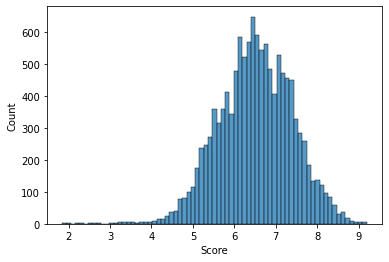

In [6]:
sns.histplot(data=df_data[df_data['Score'] != 'Unknown']['Score']);

we can 

# 1. Do newer anime have higher scores than older animes?

Null: Newer animes are **not scored higher** than older animes

Alt: Newer animes **are scored higher** than older animes

T-Test:
- Normalized score data
- reasonable to reduce to sample mean

Spliting the premiered year by median to define newer and older animes

In [7]:
df_premiered_year = df_data.iloc[:, [1]+[2]+[9]]
df_premiered_year = df_premiered_year[(df_premiered_year['Premiered'].notnull()) & (df_premiered_year['Score'].notnull())]
df_premiered_year

,Name,Score,Premiered
0,Cowboy Bebop,8.78,1998.0
2,Trigun,8.24,1998.0
3,Witch Hunter Robin,7.27,2002.0
4,Bouken Ou Beet,6.98,2004.0
5,Eyeshield 21,7.95,2005.0
...,...,...,...
17328,Jimihen!!: Jimiko wo Kaechau Jun Isei Kouyuu!!,6.12,2021.0
17365,Yami Shibai 8,6.09,2021.0
17373,Pui Pui Molcar,8.33,2021.0
17459,D4DJ Petit Mix,6.51,2021.0


In [8]:
median_premiered_year = np.median(df_premiered_year['Premiered'].values)
median_premiered_year

2010.0

The median premiered year is 2010

In [9]:
df_old_anime = df_premiered_year[df_premiered_year['Premiered'] < median_premiered_year]
df_new_anime = df_premiered_year[df_premiered_year['Premiered'] >= median_premiered_year]

In [10]:
old_anime_score = df_old_anime['Score']
new_anime_score = df_new_anime['Score']

In [11]:
'''n1 = old_anime_score.count()
n2 = new_anime_score.count()
var1 = np.var(old_anime_score)
var2 = np.var(new_anime_score)
s = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
u1 = old_anime_score.mean()
u2 = new_anime_score.mean()
d = (u1 - u2) / s
power = TTestIndPower()
n_test = power.solve_power(nobs1=n1, effect_size=d, power = None, alpha = 0.005)
n_test'''

'n1 = old_anime_score.count()\nn2 = new_anime_score.count()\nvar1 = np.var(old_anime_score)\nvar2 = np.var(new_anime_score)\ns = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))\nu1 = old_anime_score.mean()\nu2 = new_anime_score.mean()\nd = (u1 - u2) / s\npower = TTestIndPower()\nn_test = power.solve_power(nobs1=n1, effect_size=d, power = None, alpha = 0.005)\nn_test'

[Text(0.5, 1.0, 'Old Anime Score Distribution')]

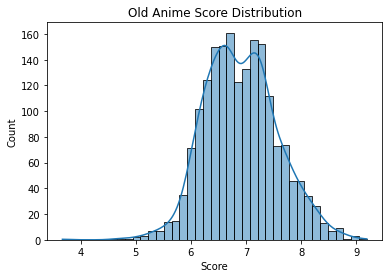

In [12]:
sns.histplot(data=old_anime_score, kde=True).set(title="Old Anime Score Distribution")

[Text(0.5, 1.0, 'New Anime Score Distribution')]

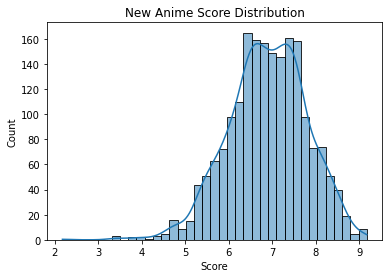

In [13]:
sns.histplot(data=new_anime_score, kde=True).set(title="New Anime Score Distribution")

In [14]:
stats.ttest_ind(old_anime_score, new_anime_score, alternative="less")

Ttest_indResult(statistic=0.8094848259797295, pvalue=0.7908565680575461)

We can accept the null hypothesis and conclude that newer anime is not neccessarily scored higher than older anime

# 2. Are adventure anime more popular than action ones?
Mann-Whitney U test:
- not reasonable to reduce to sample mean
- we have no prior knowledge on the distribution

In [15]:
df_data.columns.get_loc("(genre)Action")

43

In [16]:
Genres = ['(genre)Action', '(genre)Adventure']
df_genre = df_data.iloc[:, [2]+[3]+[17]+[43]+[44]]
df_genre = df_genre[(df_genre['Popularity'] != 'Unknown')]
df_genre

,Score,Genres,Popularity,(genre)Action,(genre)Adventure
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",39,1,1
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",518,1,0
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",201,1,1
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",1467,1,0
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",4369,0,1
...,...,...,...,...,...
17557,NaN,"Adventure, Mystery, Supernatural",13116,0,1
17558,NaN,"Comedy, Horror, Supernatural",17562,0,0
17559,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",17558,0,0
17560,NaN,"Adventure, Slice of Life, Comedy",17565,0,1


In [17]:
action_score = df_genre[df_genre['(genre)Action'] == 1]['Popularity']
adventure_score = df_genre[df_genre['(genre)Adventure'] == 1]['Popularity']

In [18]:
'''n1 = action_score.count()
n2 = adventure_score.count()
var1 = np.var(action_score)
var2 = np.var(adventure_score)
s = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
u1 = action_score.mean()
u2 = adventure_score.mean()
d = (u1 - u2) / s
power = TTestIndPower()
n_test = power.solve_power(nobs1=n1, effect_size=d, power = None, alpha = 0.005)
n_test'''

'n1 = action_score.count()\nn2 = adventure_score.count()\nvar1 = np.var(action_score)\nvar2 = np.var(adventure_score)\ns = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))\nu1 = action_score.mean()\nu2 = adventure_score.mean()\nd = (u1 - u2) / s\npower = TTestIndPower()\nn_test = power.solve_power(nobs1=n1, effect_size=d, power = None, alpha = 0.005)\nn_test'

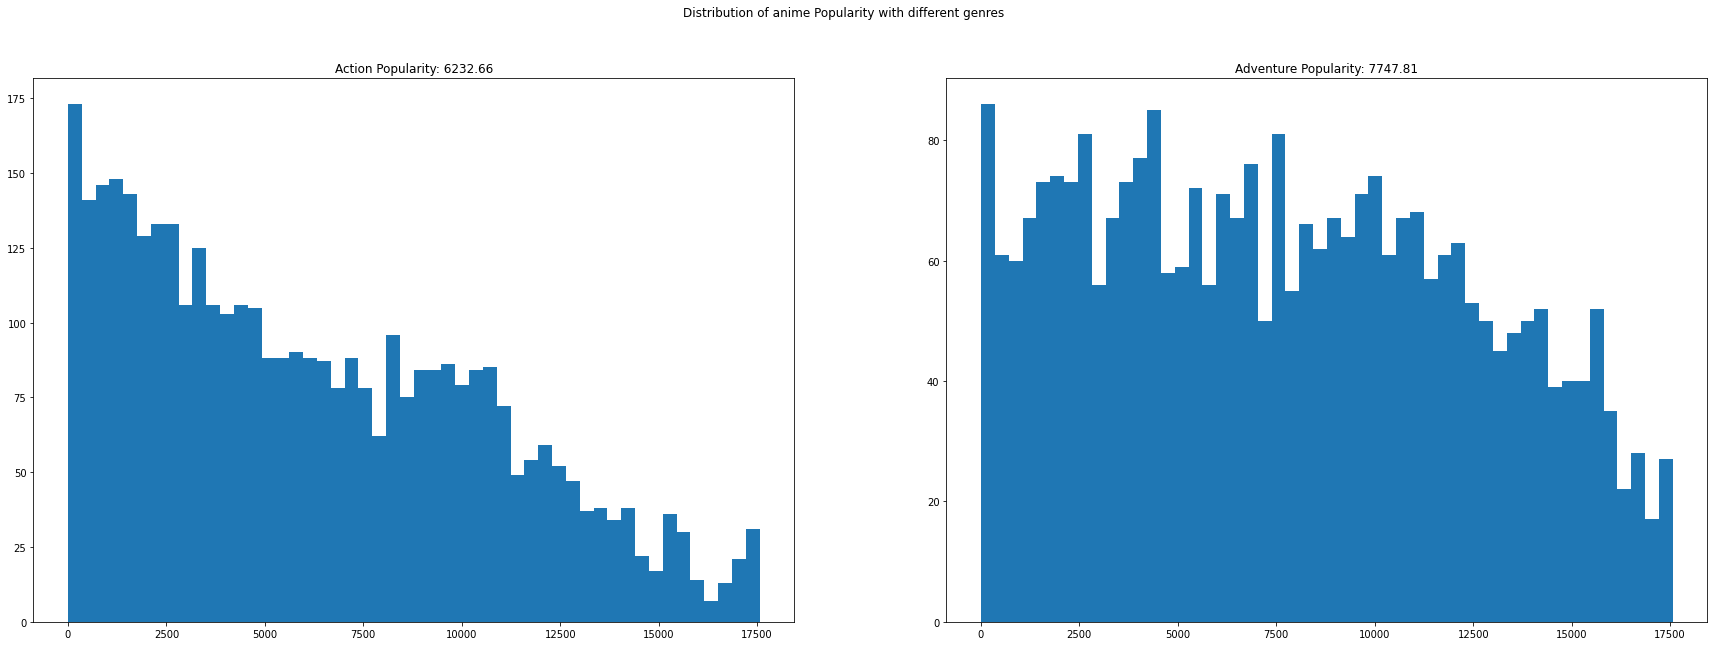

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Distribution of anime Popularity with different genres")
axs[0].hist(action_score, bins=50)
axs[0].title.set_text("Action Popularity: " + str(round(action_score.mean(), 2)))
axs[1].hist(adventure_score, bins=50)
axs[1].title.set_text("Adventure Popularity: " + str(round(adventure_score.mean(), 2)))

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


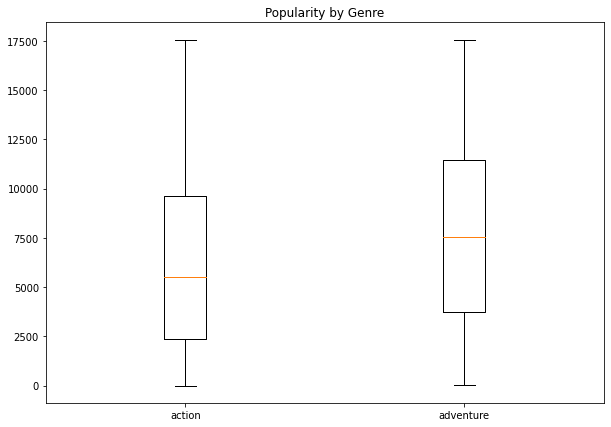

In [20]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_subplot()
data = [action_score, adventure_score]
# Creating plot
bp = ax.boxplot(data)
ax.title.set_text("Popularity by Genre")
ax.set_xticklabels(["action", "adventure"])
# show plot
plt.show()

In [21]:
stats.mannwhitneyu(action_score, adventure_score, alternative = 'less')

MannwhitneyuResult(statistic=4673254.5, pvalue=1.6037804005231797e-40)

# 3. Anime Length vs. completion
Whether users are more likely to complete anime with less episodes?

Kruskal-wallis:
1. not reasonable to reduce to sample mean
2. more than three groups

null: there is no difference in the completion rate of episodes with different length

alt: there is difference in the completion rate of episodes with differenet length

In [22]:
df_data.columns.get_loc("episodes_class")

35

In [23]:
df_anime_completion = df_data.iloc[:, [1]+[18]+[21]+[35]]
df_anime_completion = df_anime_completion[df_anime_completion["episodes_class"] != 'continue']
df_anime_completion

,Name,Members,Completed,episodes_class
0,Cowboy Bebop,1251960,718161,short
1,Cowboy Bebop: Tengoku no Tobira,273145,208333,extra_short
2,Trigun,558913,343492,short
3,Witch Hunter Robin,94683,46165,short
4,Bouken Ou Beet,13224,7314,long
...,...,...,...,...
17547,Kitarou Tanjou: Gegege no Nazo,1009,0,extra_short
17548,"The Sun, Moon and Stars",1,0,extra_short
17549,Mahoutsukai no Yome: Nishi no Shounen to Seira...,13493,4,extra_short
17552,SK∞: Crazy Rock Jam,10722,7207,extra_short


In [24]:
df_anime_completion["Completion Rate"] = df_anime_completion["Completed"] / df_anime_completion["Members"]
df_anime_completion

,Name,Members,Completed,episodes_class,Completion Rate
0,Cowboy Bebop,1251960,718161,short,0.573629
1,Cowboy Bebop: Tengoku no Tobira,273145,208333,extra_short,0.762719
2,Trigun,558913,343492,short,0.614571
3,Witch Hunter Robin,94683,46165,short,0.487574
4,Bouken Ou Beet,13224,7314,long,0.553085
...,...,...,...,...,...
17547,Kitarou Tanjou: Gegege no Nazo,1009,0,extra_short,0.000000
17548,"The Sun, Moon and Stars",1,0,extra_short,0.000000
17549,Mahoutsukai no Yome: Nishi no Shounen to Seira...,13493,4,extra_short,0.000296
17552,SK∞: Crazy Rock Jam,10722,7207,extra_short,0.672169


In [25]:
exshort_rate = df_anime_completion[df_anime_completion["episodes_class"] == 'extra_short']["Completion Rate"]
short_rate = df_anime_completion[df_anime_completion["episodes_class"] == 'short']["Completion Rate"]
med_rate = df_anime_completion[df_anime_completion["episodes_class"] == 'medium']["Completion Rate"]
long_rate = df_anime_completion[df_anime_completion["episodes_class"] == 'long']["Completion Rate"]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


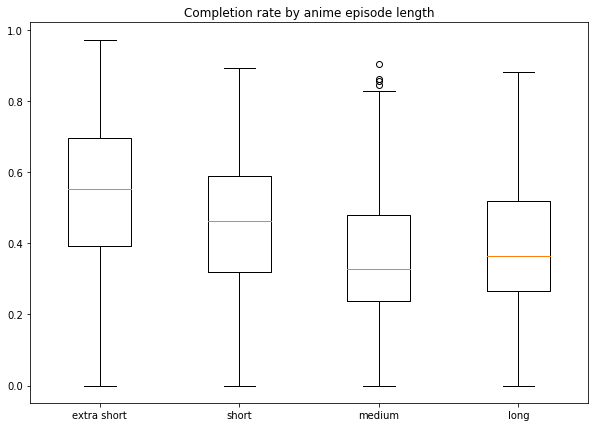

In [26]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_subplot()
data = [exshort_rate, short_rate, med_rate, long_rate]
# Creating plot
bp = ax.boxplot(data)
ax.title.set_text("Completion rate by anime episode length")
ax.set_xticklabels(["extra short", "short", "medium", "long"])
# show plot
plt.show()

In [27]:
stats.kruskal(exshort_rate, short_rate, med_rate, long_rate)

KruskalResult(statistic=1155.7820161568202, pvalue=2.8765859141291886e-250)

In [28]:
stats.mannwhitneyu(med_rate, long_rate, alternative="less")

MannwhitneyuResult(statistic=236867.5, pvalue=0.00015361241988679183)